shape of matrix: (8, 8)
cost_matrix: [[ 68.8839604   49.24428901  26.92582404  14.14213562  68.8839604
   64.63745044  91.30169768   7.81024968]
 [ 38.60051813  19.84943324   5.09901951  44.28317965  37.65634077
   51.42956348  61.03277808  36.22154055]
 [ 61.03277808  55.36244214  51.73973328  71.56814934  45.70557953
   10.          75.96051606  73.35529974]
 [ 27.          12.04159458  23.76972865  60.8276253   36.67424164
   71.56814934  47.5394573   48.25971405]
 [  8.94427191  14.          34.92849839  75.13321503  12.80624847
   61.13100686  30.47950131  65.80273551]
 [ 25.8069758    7.61577311  16.55294536  56.82429058  27.01851217
   55.54277631  48.25971405  47.5394573 ]
 [ 15.5241747   15.65247584  32.75667871  72.23572523  10.04987562
   54.14794548  35.4682957   64.13267498]
 [ 82.15229759  62.68173578  39.96248241   1.41421356  80.65358021
   67.23094526 104.6231332   16.2788206 ]]
The bottom right matrix: [[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.4142135

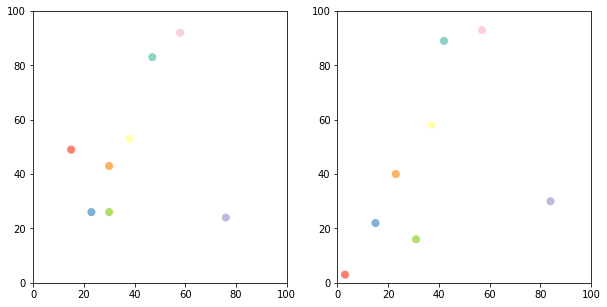

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
from scipy.optimize import linear_sum_assignment
import math

frame0 = np.array([[47, 83],[38, 53],[76, 24],[15, 49],[23, 26],[30, 43],[30, 26],[58, 92]])
frame1 = np.array([[15, 22],[23, 40],[37, 58],[57, 93],[31, 16],[84, 30],[3, 3],[42, 89]])



def get_cost(frame0, frame1):

	# Cost matrix for particle assignment between frames (no merging/splitting)
  #top left quadrent
  #calculate l2 difference

  cost_matrix = np.array([[np.linalg.norm(x-y) for x in frame0] for y in frame1])  
  print("shape of matrix:", cost_matrix.shape)
  cost_matrix = cost_matrix.T
  print("cost_matrix:", cost_matrix)


  # find min value
  minVal = np.min(cost_matrix)
  rMat = []
  #bottom right
  n = len(frame0)
  m =len(frame1)
  br = np.full((m, n), minVal)
  print("The bottom right matrix:", br)
  
  import copy
  copy_matrix = copy.deepcopy(cost_matrix)

  #replace the sd with cut-off value in bottom left
  row = len(cost_matrix)
  col = len(cost_matrix[0])
  for i in range(row):
    r = (np.std(cost_matrix[i]))*3
    rMat.append(r)
    print("R:", r)
    for j in range(col):
      if cost_matrix[i][j] >r: 
        x = r #The cut off-value
        cost_matrix[i][j] = r
      #arr = np.where(cost_matrix[i] < r, cost_matrix[i], r)

  #80th percentile
  #b and d are the same
  tr = np.full((m, n), 0)
  bl = np.full((m, n), 0)
  d = np.percentile(cost_matrix, 80)
  for i in range(row):
    for j in range(col):
      r = (np.std(copy_matrix[i]))*3
      if copy_matrix[i][j] >r: 
        x =  r
  #creating top right
  print("rMat:", rMat)
  for index, val in enumerate(rMat):
    for k in range(row):
      for t in range(col):
        if index == k: 
          tr[k][t] = val
        else: continue
  print("tr:", tr)
  for i in range(row):
    for j in range(col):
      if i ==j: tr[i][j] = d

  print("tr:", tr)
  #stack everything
  t = np.hstack((cost_matrix, tr))
  b = np.hstack((bl, br))
  cost = np.vstack((t, b))
  print('shape of final matrix:', cost.shape)
  return cost
 

def lap(cost):
	# Implement the linear assignment
  row_ind, col_ind = linear_sum_assignment(cost)
  return row_ind, col_ind


def main():
	cost = get_cost(frame0, frame1)
	row_ind, col_ind = lap(cost)

	#For plotting. Same color same particle. Newly appeared particle is in another color.
	cmap = get_cmap("Set3")
	colors = cmap.colors
	frame1_colors = [colors[frame0.shape[0]]] * frame0.shape[0] #color all particles with "new particle" color first
	for i in range(frame0.shape[0]):
		the_col = col_ind[i]
		if the_col < frame0.shape[0]:
			frame1_colors[the_col] = colors[i] #assign to frame0 color if not a new particle

	fig, ax = plt.subplots(1, 2, figsize = (10, 5))
	ax[0].scatter(frame0[:,0], frame0[:,1], s = 50, color = colors[:frame0.shape[0]])
	ax[1].scatter(frame1[:,0], frame1[:,1], s = 50, color = frame1_colors)
	plt.setp(ax, xlim=(0, 100), ylim=(0, 100))
	plt.show()
	return

if __name__ == '__main__':
	main()

Doing image registration for question2 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ref.jpg to ref.jpg
Saving input_fig.jpg to input_fig.jpg


Input Image
AxesImage(54,36;334.8x217.44)


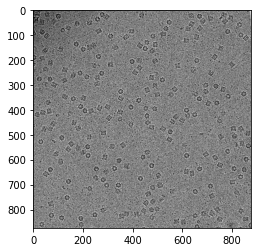

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
 
# Open the image files.
inputImage = cv2.imread("input_fig.jpg")  # Image to be aligned.
# print(img1_color.shape)
refImage = cv2.imread("ref.jpg")    # Reference image.

print("Input Image")
print(plt.imshow(inputImage))


Reference Image:
AxesImage(54,36;334.8x217.44)


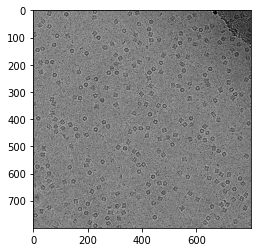

In [ ]:
print("Reference Image:")
print(plt.imshow(refImage))

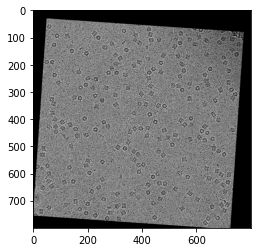

In [ ]:
# Convert to grayscale.
#Code reference: https://www.geeksforgeeks.org/image-registration-using-opencv-python/
img1 = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(refImage, cv2.COLOR_BGR2GRAY)
height, width = img2.shape
 
# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)
 
# Find keypoints and descriptors.
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)
 
# Match features between the two images.
# Brute Force matcher with Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
 
# Match the two sets of descriptors.
matches = matcher.match(d1, d2)
matches = list(matches)

# Sort matches on the basis of their Hamming distance.
matches.sort(key = lambda x: x.distance)
 
# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)
 
# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
 
for i in range(len(matches)):
  p1[i, :] = kp1[matches[i].queryIdx].pt
  p2[i, :] = kp2[matches[i].trainIdx].pt
 
# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
 
# Use this matrix to transform the
# colored image wrt the reference image.
transformImage = cv2.warpPerspective(inputImage,
                    homography, (width, height))
plt.imshow(transformImage)
# cv2.imwrite('output.jpg', transformed_img)

#Variational Autoencoder question 3


In [ ]:
import torch
from torch import nn


In [ ]:
class varAuto(nn.Module):
 
    def __init__(self, input_dim, z_dim, h_dim):
        super().__init__()
        # encoder
        self.img_2hid = nn.Linear(input_dim, h_dim)

        # one for mu and one for stds, note how we only output
        # diagonal values of covariance matrix. Here we assume
        # the pixels are conditionally independent 
        self.hid_2mu = nn.Linear(h_dim, z_dim)
        self.hid_2sigma = nn.Linear(h_dim, z_dim)

        # decoder
        self.z_2hid = nn.Linear(z_dim, h_dim)
        self.hid_2img = nn.Linear(h_dim, input_dim)

    def encode(self, x):
        h = F.relu(self.img_2hid(x))
        mu = self.hid_2mu(h)
        sigma = self.hid_2sigma(h)
        return mu, sigma

    def decode(self, z):
        new_h = F.relu(self.z_2hid(z))
        x = torch.sigmoid(self.hid_2img(new_h))
        return x

    def forward(self, x):
        mu, sigma = self.encode(x)

        # Sample from latent distribution from encoder
        epsilon = torch.randn_like(sigma)
        z_reparametrized = mu + sigma*epsilon

        x = self.decode(z_reparametrized)
        return x, mu, sigma





In [ ]:
#load Dataset
def load_dataset():
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

    train_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train'
    valid_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/validation'
    test_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/test'

    train_dataset = torchvision.datasets.ImageFolder(root=train_data_path,transform=torchvision.transforms.ToTensor())
    test_dataset = torchvision.datasets.ImageFolder(root=test_data_path,transform=torchvision.transforms.ToTensor())
    valid_dataset = torchvision.datasets.ImageFolder(root=valid_data_path,transform=torchvision.transforms.ToTensor())

    train_iterator = torch.utils.data.DataLoader(train_dataset,batch_size=32,num_workers=0,shuffle=True)
    test_iterator = torch.utils.data.DataLoader(test_dataset,batch_size=32,num_workers=0,shuffle=True)
    valid_iterator = torch.utils.data.DataLoader(valid_dataset,batch_size=32,num_workers=0,shuffle=True)
    
    return train_iterator, test_iterator, valid_iterator  

In [ ]:
# Define train function
# def train(num_epochs, model, optimizer, loss_fn):
#     # Start training
#     for epoch in range(num_epochs):
#         loop = tqdm(enumerate(train_loader))
#         for i, (x, y) in loop:
#             # Forward pass
#             x = x.to(device).view(-1, INPUT_DIM)
#             x_reconst, mu, sigma = model(x)

#             # loss, formulas from https://www.youtube.com/watch?v=igP03FXZqgo&t=2182s
#             reconst_loss = loss_fn(x_reconst, x)
#             kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))

#             # Backprop and optimize
#             loss = reconst_loss + kl_div
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#             loop.set_postfix(loss=loss.item())

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# INPUT_DIM = 784
# Z_DIM = 20
# H_DIM = 200
# NUM_EPOCHS = 10
# BATCH_SIZE = 32
# LR_RATE = 3e-4
# # Initialize model, optimizer, loss
# model = varAuto(INPUT_DIM, Z_DIM).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=LR_RATE)
# loss_fn = nn.BCELoss(reduction="sum")

# Run training
# train(NUM_EPOCHS, model, optimizer, loss_fn)

In [ ]:
# -*- coding: utf-8 -*-
"""q2

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Cc70UuyqJN4ZrXe8UFDYow4hO7K5Q4my
"""

from IPython.utils.py3compat import encode
#Autoencoder

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import os
import random
import numpy as np
import argparse
import sys
import time

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

    


def train(model, device, iterator, optimizer, criterion):
    
    epoch_loss = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        # x = x.reshape(-1, 512*382)
        optimizer.zero_grad()
            
        fx, mu, sigma = model(x)
        
        reconst_loss = criterion(fx, x)
        kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
        
        #Backprop and optimize

        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # loop.set_postfix(loss=loss.item())
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)  


# def calculate_accuracy(fx, y):
#     print("shape of y:", y.shape)
#     print("shape of fx:", fx.shape)
#     preds = fx.index(max(fx))
#     print("shape of preds:", preds.shape)
#     correct = preds.eq(y.view_as(preds)).sum().item()
#     acc = correct.float()/preds.shape[0]
#     return acc 

# index(max(probab))


def evaluate(model, device, iterator, criterion):
    
    from mxnet import np, npx
    acc = mx.metric.Accuracy()
    epoch_loss, l = 0, 0
    epoch_acc, a = 0, 0
    epoch_lossList = []
    epoch_accList = []
    counter =0
    
    model.eval()
    
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            fx, mu, sigma = model(x)
            result = (fx, x)

            loss = criterion(fx, x)
            fx = fx.cpu().numpy()
            # fx = fx.nd.array()
            fx = mx.np.array(fx)
            print("aftr stack shape:", fx.shape)
            predictions = np.argmax(fx, axis=1)
            print(predictions.shape)
            predictions = predictions.as_nd_ndarray()
            acc.update(preds=predictions.tensor(), labels=y.tensor())
            accu = acc.get()[1]


            epoch_loss += loss.item()
            epoch_acc += accu.item()
            
            l = epoch_loss / len(iterator)
            a = epoch_acc / len(iterator)
            counter +-1
            if counter %10 ==0:
              epoch_lossList.append(l)
              epoch_accList.append(a)
            
    return l, result, epoch_lossList



   

                    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


optimizer = optim.Adam(model.parameters(), lr=0.001)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
criterion = nn.BCELoss(reduction="sum")

load_checkpoint, skip_train = False, False

#You are recommended to store check points
if len(sys.argv) > 1:
    if sys.argv[1] == "c":
        load_checkpoint = True
    elif sys.argv[1] == "s":
        skip_train = True  #Proceed directly to testing


### Training ###
SAVE_DIR = 'models'
SAVE_PATH = os.path.join(SAVE_DIR, "Var autoencoder.pt")

if not os.path.isdir(SAVE_DIR):
    os.makedirs(SAVE_DIR)

if load_checkpoint:
    checkpoint = torch.load(SAVE_PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']



xt, yt = train_iterator
vx, vy = valid_iterator
model.fit(xt, yt, vx, vy, epochs=20, batch_size=10)



# if not skip_train:
#     time_curr = time.time()
#     best_val_loss = float('inf')
#     for epoch in range(EPOCHS):
        
#         train_loss = train(model, device, train_iterator, optimizer, criterion)
        
#         print("pass")
#         valid_loss, vResult, vList = evaluate(model, device, valid_iterator, criterion)

#         if valid_loss < best_val_loss:
#             torch.save({
#                 'epoch': epoch,
#                 'model_state_dict': model.state_dict(),
#                 'optimizer_state_dict': optimizer.state_dict(),
#                 }, SAVE_PATH)
#             best_val_loss = valid_loss
    
#         print('| Epoch: {0:d} | Train Loss: {1:.4f} | Valid Loss : {2:.4f} | Time: {3:d}'.format(epoch+1, 
#             train_loss, valid_loss, int(time.time() - time_curr)))
#         time_curr = time.time()
    
    
checkpoint = torch.load(SAVE_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']

model.eval()

#PLEASE IMPLEMENT YOUR TESTING HERE
test_loss, tResult, tList = evaluate(model, device, test_iterator, criterion)
print('| Test Loss: {0:.3f} |'.format(test_loss))

def imageGeneration(iterator, result):
  dict1 = {}
  dict2 = {}
  fx, x = result
  for i, (x,y) in enumerate(iterator):
    print("Y:", y)
    print("x SIZE:", x.size())

    x = x.to(device)
    y = y.to(device)
    # print("shape of y:",y.size())
    # print("shape of x:", x.size())
    dict1[y][i]= x
    dict2[y][i] = fx

  return dict1, dict2

### Testing ### 
fx,x = tResult
import matplotlib.pyplot as plt

print(fx.size())
print(x.size())
image = (x[27])
image2 = (fx[27])
print(plt.imshow(image.T.cpu().data.numpy()))

plt.gray()
print(plt.imshow(image2.T.cpu().data.numpy(), cmap = 'gray'))



cpu


NameError: ignored

In [ ]:
# Training Function 
def saveModel(): 
    path = "./NetModel.pth" 
    torch.save(model.state_dict(), path)

def train_ac(num_epochs, model, train_loader, valid_loader, criterion): 
    best_accuracy = 0.0 
     
    print("Begin training...") 
    for epoch in range(1, num_epochs+1): 
        running_train_loss = 0.0 
        running_accuracy = 0.0 
        running_vall_loss = 0.0 
        total = 0 
 
        # Training Loop 
        for data in train_loader: 
        #for data in enumerate(train_loader, 0): 
            inputs, outputs = data  # get the input and real species as outputs; data is a list of [inputs, outputs]
            inputs = inputs.to(device) 
            outputs = outputs.to(device)
            optimizer.zero_grad()   # zero the parameter gradients          
            predicted_outputs, mu, sigma = model(inputs)   # predict output from the model 
            train_loss = criterion(predicted_outputs, outputs)   # calculate loss for the predicted output  
            kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
        
            #Backprop and optimize
            loss =  train_loss+ kl_div
            loss.backward()   # backpropagate the loss 
            optimizer.step()        # adjust parameters based on the calculated gradients 
            running_train_loss +=loss.item()  # track the loss value 
 
        # Calculate training loss value 
        train_loss_value = running_train_loss/len(train_loader) 
 
        # Validation Loop 
        with torch.no_grad(): 
            model.eval() 
            for data in valid_loader: 
               inputs, outputs = data 
               predicted_outputs, mu1, sigma1 = model(inputs) 
               kl_div1 = - torch.sum(1 + torch.log(sigma1.pow(2)) - mu1.pow(2) - sigma1.pow(2))
               val_loss = criterion(predicted_outputs, outputs) 
               val_loss = val_loss + kl_div1
               # The label with the highest value will be our prediction 
               _, predicted = torch.max(predicted_outputs, 1) 
               running_vall_loss += val_loss.item()  
               total += outputs.size(0) 
               running_accuracy += (predicted == outputs).sum().item() 
 
        # Calculate validation loss value 
        val_loss_value = running_vall_loss/len(valid_loader) 
                
        # Calculate accuracy as the number of correct predictions in the validation batch divided by the total number of predictions done.  
        accuracy = (100 * running_accuracy / total)     
 
        # Save the model if the accuracy is the best 
        if accuracy > best_accuracy: 
            saveModel() 
            best_accuracy = accuracy 
         
        # Print the statistics of the epoch 
        print('Completed training batch', epoch, 'Training Loss is: %.4f' %train_loss_value, 'Validation Loss is: %.4f' %val_loss_value, 'Accuracy is %d %%' % (accuracy))



In [ ]:
train_iterator, test_iterator, valid_iterator= load_dataset()
num_epochs = 10
INPUT_DIM = 512
Z_DIM = 20
H_DIM = 200
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = varAuto(INPUT_DIM,Z_DIM,H_DIM).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_ac(num_epochs, model, train_iterator, valid_iterator, criterion)

Begin training...


RuntimeError: ignored